In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [23]:
data=pd.read_csv('Financ_Transactions.csv')
data=data.drop('TX_DATETIME',axis=1)
# data=data.drop('TX_DATETIME',axis=1)
# data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'])
# data['TX_TIME_SECONDS'] = (data['TX_DATETIME'] - data['TX_DATETIME'].min()).dt.total_seconds()
# data['TX_TIME_DAYS'] = (data['TX_DATETIME'] - data['TX_DATETIME'].min()).dt.days
data.head()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,596,3156,533.07,31,0,0,0
1,1,1,4961,3412,808.56,130,0,0,0
2,2,2,2,1365,1442.94,476,0,1,1
3,3,3,4128,8737,620.65,569,0,0,0
4,4,4,927,9906,490.66,634,0,0,0


In [24]:
data.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8)
memory usage: 120.4 MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1754155.0,8.770770e+05,5.063811e+05,0.0,438538.50,877077.00,1.315616e+06,1754154.0
TRANSACTION_ID,1754155.0,8.770770e+05,5.063811e+05,0.0,438538.50,877077.00,1.315616e+06,1754154.0
CUSTOMER_ID,1754155.0,2.504011e+03,1.445987e+03,0.0,1252.00,2506.00,3.765000e+03,4999.0
TERMINAL_ID,1754155.0,4.996733e+03,2.886101e+03,0.0,2502.00,4994.00,7.495000e+03,9999.0
TX_AMOUNT,1754155.0,5.396820e+02,1.179711e+03,0.0,179.95,421.75,7.505950e+02,647837.5
TX_TIME_SECONDS,1754155.0,7.903234e+06,4.565172e+06,31.0,3940846.50,7902670.00,1.186566e+07,15811197.0
TX_TIME_DAYS,1754155.0,9.097260e+01,5.283709e+01,0.0,45.00,91.00,1.370000e+02,182.0
TX_FRAUD,1754155.0,1.345200e-01,3.412103e-01,0.0,0.00,0.00,0.000000e+00,1.0
TX_FRAUD_SCENARIO,1754155.0,1.449746e-01,3.874872e-01,0.0,0.00,0.00,0.000000e+00,3.0


In [6]:
cd=data['TX_FRAUD'].value_counts()
f_cou=cd[1]
nf_cou=cd[0]
ttl_cou=len(data)
f_per=(f_cou/ttl_cou)*100
nf_per=(nf_cou/ttl_cou)*100
print('*'*80)
print("\nFradulent percentage",f_per)
print('*'*80)
print("\nNon Fradulent percentage:\t",nf_per)
print('*'*80)
print("\nTotal Count:\t",ttl_cou)
print('*'*80)

********************************************************************************

Fradulent percentage 13.45200395632085
********************************************************************************

Non Fradulent percentage:	 86.54799604367915
********************************************************************************

Total Count:	 1754155
********************************************************************************


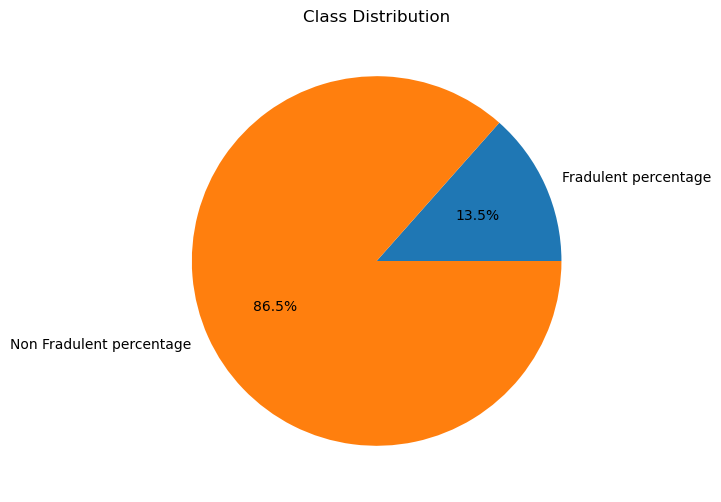

In [7]:
plt.figure(figsize=(8,6))
plt.title("Class Distribution")
plt.pie([f_per,nf_per],labels=["Fradulent percentage","Non Fradulent percentage"],autopct='%1.1f%%')
plt.show()

In [8]:
x=data.iloc[:,1:-2]
# x.head(3)
y=data.iloc[:,-2:-1]
# y.head(2)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=3)
# ytrain = ytrain.values.ravel()
log_reg=LogisticRegression()
log_reg.fit(xtrain,ytrain)
ypred=log_reg.predict(xtest)

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when 

In [9]:
print('\n*****Training Data Shape" *******\n')

print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)

print('\n***************Testing Data Shape***************\n')

print('\nTesting data (x-Input) Shape:\t',xtest.shape)

print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)


*****Training Data Shape" *******


Training data-X- Shape:	 (1315616, 6)

Training data-y- Shape:	 (1315616, 1)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (438539, 6)

Testing data (y-Outcome) Shape:	 (438539, 1)


In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('\n*****Performance measure for logistic regression classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nPrecision score:\t",precision_score(ytest,ypred))
print("\n****************************** "*2)
      
print("\nConfusion Matrix:\t",confusion_matrix(ytest,ypred))
print("\n****************************** "*2)

print('\nF1 score: \t',f1_score(ytest,ypred))

print("\n****************************** "*2)

print('\nRecall score: \t',recall_score(ytest,ypred))

print("\n****************************** "*2)



*****Performance measure for logistic regression classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.8930129361356687

****************************** 
****************************** 

Precision score:	 0.6015158818542958

****************************** 
****************************** 

Confusion Matrix:	 [[355432  23974]
 [ 22944  36189]]

****************************** 
****************************** 

F1 score: 	 0.6067093615879828

****************************** 
****************************** 

Recall score: 	 0.611993303231698

****************************** 
****************************** 


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['TX_AMOUNT', 'TX_TIME_SECONDS']] = scaler.fit_transform(data[['TX_AMOUNT', 'TX_TIME_SECONDS']])
data.fillna(0, inplace=True)
data = pd.get_dummies(data, columns=['TERMINAL_ID', 'TX_FRAUD_SCENARIO'], drop_first=True)

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=3)
X_resampled, y_resampled = smote.fit_resample(data.iloc[:, 1:-2], data.iloc[:, -2:-1])


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MemoryError: Unable to allocate 131. GiB for an array with shape (9999, 1754155) and data type float64

In [84]:
feature_importance = pd.Series(log_reg.coef_[0], index=data.iloc[:, 1:-2].columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

# Now, you can train the logistic regression model on the resampled data
log_reg_resampled = LogisticRegression()
log_reg_resampled.fit(x_resampled, y_resampled)
ypred_resampled = log_reg_resampled.predict(xtest)


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('\n*****Performance measure for logistic regression with feature-engineered and balanced data" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t", accuracy_score(ytest, ypred_resampled))
print("\n****************************** "*2)
print("\nPrecision score:\t", precision_score(ytest, ypred_resampled))
print("\n****************************** "*2)
print("\nConfusion Matrix:\t", confusion_matrix(ytest, ypred_resampled))
print("\n****************************** "*2)
print('\nF1 score: \t', f1_score(ytest, ypred_resampled))
print("\n****************************** "*2)
print('\nRecall score: \t', recall_score(ytest, ypred_resampled))
print("\n****************************** "*2)



*****Performance measure for logistic regression with feature-engineered and balanced data" *******


****************************** 
****************************** 

Accuracy Score :	 0.839264010726526

****************************** 
****************************** 

Precision score:	 0.4526935830570043

****************************** 
****************************** 

Confusion Matrix:	 [[313715  65691]
 [  4798  54335]]

****************************** 
****************************** 

F1 score: 	 0.6065561875205823

****************************** 
****************************** 

Recall score: 	 0.9188608729474236

****************************** 
****************************** 


In [29]:
# Get the coefficients of the logistic regression model
coefficients = log_reg_resampled.coef_[0]

# Pair features with their coefficients
feature_coefficients = list(zip(xtrain.columns, coefficients))

# Sort features by coefficient magnitude
feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Display the features with the highest positive and negative coefficients
top_positive_features = feature_coefficients[:5]
top_negative_features = feature_coefficients[-5:]

print("Top positive features:")
for feature, coefficient in top_positive_features:
    print(f"{feature}: {coefficient}")

print("\nTop negative features:")
for feature, coefficient in top_negative_features:
    print(f"{feature}: {coefficient}")


Top positive features:
TX_AMOUNT: 0.006022564255940533
CUSTOMER_ID: -0.0006209429358142684
TERMINAL_ID: -0.00030817530515176496
TRANSACTION_ID: -0.00013012300882090307
TX_TIME_SECONDS: 1.4250485416894481e-05

Top negative features:
CUSTOMER_ID: -0.0006209429358142684
TERMINAL_ID: -0.00030817530515176496
TRANSACTION_ID: -0.00013012300882090307
TX_TIME_SECONDS: 1.4250485416894481e-05
TX_TIME_DAYS: 1.523184804085275e-07


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate performance metrics for the initial model
initial_model_accuracy = accuracy_score(ytest, ypred)
initial_model_precision = precision_score(ytest, ypred)
initial_model_recall = recall_score(ytest, ypred)
initial_model_f1 = f1_score(ytest, ypred)

# Calculate performance metrics for the feature-engineered and balanced model
feature_engineered_model_accuracy = accuracy_score(ytest, ypred_resampled)
feature_engineered_model_precision = precision_score(ytest, ypred_resampled)
feature_engineered_model_recall = recall_score(ytest, ypred_resampled)
feature_engineered_model_f1 = f1_score(ytest, ypred_resampled)

# Compare and document the results
print("Comparison of Initial Model and Feature-Engineered Model:")
print("--------------------------------------------------------")
print("Metric \t\t Initial Model \t Feature-Engineered Model")
print("--------------------------------------------------------")
print(f"Accuracy \t\t {initial_model_accuracy:.2f} \t\t {feature_engineered_model_accuracy:.2f}")
print(f"Precision \t\t {initial_model_precision:.2f} \t\t {feature_engineered_model_precision:.2f}")
print(f"Recall \t\t\t {initial_model_recall:.2f} \t\t {feature_engineered_model_recall:.2f}")
print(f"F1 Score \t\t {initial_model_f1:.2f} \t\t {feature_engineered_model_f1:.2f}")
print("--------------------------------------------------------")


Comparison of Initial Model and Feature-Engineered Model:
--------------------------------------------------------
Metric 		 Initial Model 	 Feature-Engineered Model
--------------------------------------------------------
Accuracy 		 0.89 		 0.84
Precision 		 0.60 		 0.45
Recall 			 0.61 		 0.92
F1 Score 		 0.61 		 0.61
--------------------------------------------------------
